<a href="https://colab.research.google.com/github/stav-aizik/AI-PROJECT/blob/main/project_tesla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
#import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#TESLA - Download data and pre-processing

In [133]:
#download data(tesla)
tsla = yf.download("TSLA",start="2022-07-04",end="2023-07-04")
tsla.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [134]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        251 non-null    datetime64[ns]
 1   (Close, TSLA)   251 non-null    float64       
 2   (High, TSLA)    251 non-null    float64       
 3   (Low, TSLA)     251 non-null    float64       
 4   (Open, TSLA)    251 non-null    float64       
 5   (Volume, TSLA)  251 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.9 KB


In [135]:
tsla.columns = [col[0] for col in tsla.columns]

In [136]:
tsla

,Date,Close,High,Low,Open,Volume
0,2022-07-05,233.066666,233.146667,216.166672,223.000000,84581100
1,2022-07-06,231.733337,234.563339,227.186661,230.779999,71853600
2,2022-07-07,244.543335,245.363327,232.210007,233.919998,81930600
3,2022-07-08,250.763336,254.979996,241.160004,242.333328,101854200
4,2022-07-11,234.343338,253.063339,233.626663,252.103333,99241200
...,...,...,...,...,...,...
246,2023-06-27,250.210007,250.389999,240.850006,243.240005,164968200
247,2023-06-28,256.239990,259.880005,248.889999,249.699997,159770800
248,2023-06-29,257.500000,260.739990,253.610001,258.029999,131283400
249,2023-06-30,261.769989,264.450012,259.890015,260.600006,112267600


In [137]:
tsla.reset_index(inplace=True)

In [138]:
tsla.index

RangeIndex(start=0, stop=251, step=1)

In [139]:
tsla['Date']=pd.to_datetime(tsla['Date'])

#Tesla - Graphs

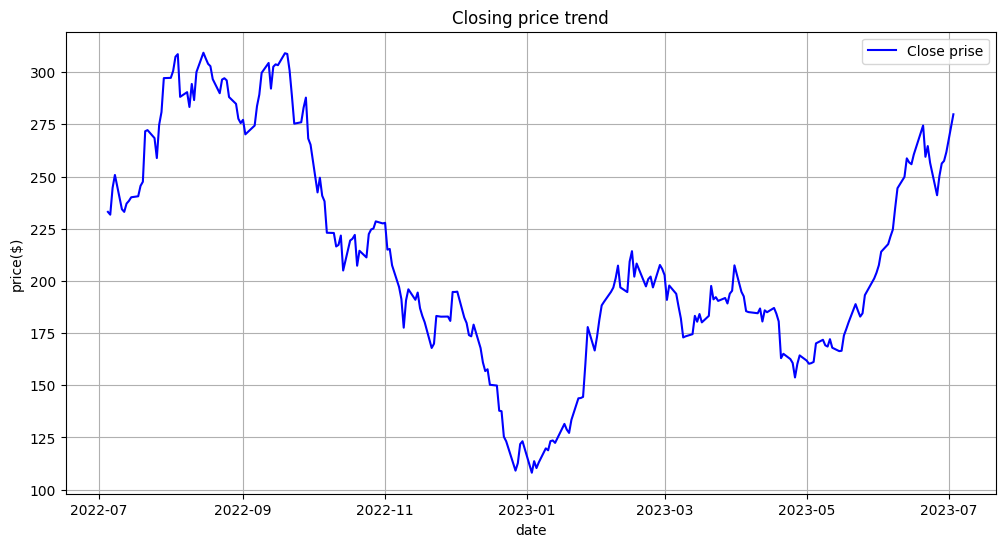

In [141]:
#graph 1 : Closing price trend
plt.figure(figsize=(12,6))
plt.plot(tsla['Date'],tsla['Close'],label='Close prise',color='blue')
#plt.plot(tsla['date'],tsla['Open'],label='open prise',color='orange')
plt.title('Closing price trend')
plt.xlabel('date')
plt.ylabel('price($)')
plt.grid(True)
plt.legend()
plt.show()

In [142]:
#graph 2 : ממוצעים נעים ?

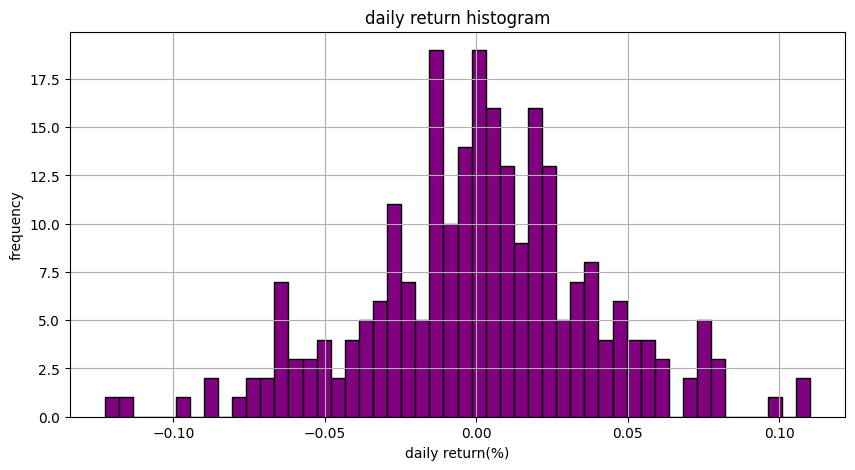

In [143]:
#graph 3 : daily return (percentage)
tsla['daily return'] = tsla['Close'].pct_change()
#histogram
plt.figure(figsize=(10,5))
plt.hist(tsla['daily return'].dropna(),bins=50,color='purple',edgecolor = 'black')
plt.title('daily return histogram')
plt.xlabel('daily return(%)')
plt.ylabel('frequency')
plt.grid(True)
plt.show()

#Tesla statistics

In [144]:
tsla[['Open', 'High', 'Low', 'Close', 'Volume']].describe()

,Open,High,Low,Close,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,211.335432,216.184940,206.326016,211.425365,1.227532e+08
std,51.943259,52.663119,51.309378,51.967260,4.987700e+07
min,103.000000,111.750000,101.809998,108.099998,4.186470e+07
25%,176.635002,182.419998,172.504997,178.474998,8.223405e+07
50%,198.539993,203.000000,192.889999,197.580002,1.166622e+08
75%,250.645004,258.660004,245.939995,253.331665,1.591312e+08
max,311.666656,314.666656,305.579987,309.320007,3.065906e+08


In [145]:
tsla['daily return'].describe()

,daily return
count,250.000000
mean,0.001466
std,0.038316
min,-0.122422
25%,-0.020107
50%,0.002087
75%,0.022736
max,0.110002


In [146]:
tsla['return_residual'] = tsla['daily return'] - tsla['daily return'].mean()

In [147]:
tsla['return_residual']

,return_residual
0,NaN
1,-0.007187
2,0.053813
3,0.023969
4,-0.066946
...,...
246,0.036534
247,0.022634
248,0.003451
249,0.015116


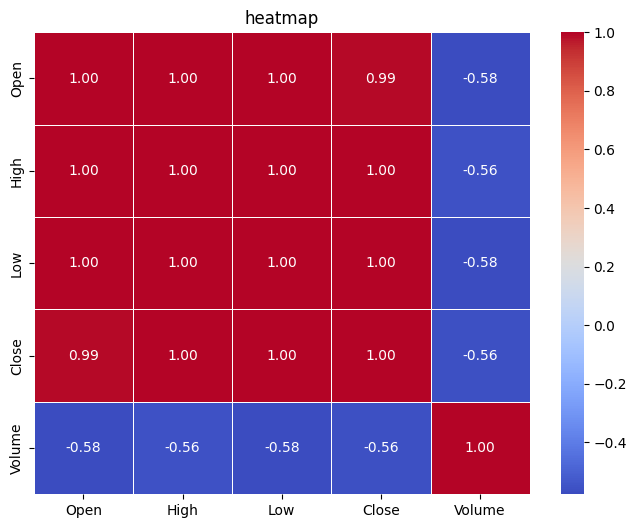

In [148]:
#correlation_matrix
correlation_matrix= tsla[['Open','High','Low','Close','Volume']].corr()
#print("correlation_matrix")
#display(correlation_matrix)
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidths=0.5,fmt=".2f")
plt.title('heatmap')
plt.show()

#טבלה

In [149]:
pd.concat([tsla["Close"],
          tsla["Close"].shift(-1),
          tsla["Close"].shift(+1)],
          keys = ["Close","TMW","Yesterdy"],axis=1).head()

,Close,TMW,Yesterdy
0,233.066666,231.733337,NaN
1,231.733337,244.543335,233.066666
2,244.543335,250.763336,231.733337
3,250.763336,234.343338,244.543335
4,234.343338,233.070007,250.763336


In [150]:
tsla["Close Change"] = (tsla["Close"].shift(-1) - tsla["Close"])

In [151]:
tsla.loc[tsla["Close Change"]>0,"label"]=1
tsla.loc[tsla["Close Change"]<0,"label"] = -1

In [152]:
tsla = tsla.dropna(subset=['Close Change'])

In [153]:
tsla.drop(columns=['return_residual','daily return','index'],inplace= True)

<ipython-input-153-b65834f0316c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla.drop(columns=['return_residual','daily return','index'],inplace= True)


In [154]:
tsla.set_index('Date', inplace=True)

In [155]:
tsla

,Close,High,Low,Open,Volume,Close Change,label
Date,,,,,,,
2022-07-05,233.066666,233.146667,216.166672,223.000000,84581100,-1.333328,-1.0
2022-07-06,231.733337,234.563339,227.186661,230.779999,71853600,12.809998,1.0
2022-07-07,244.543335,245.363327,232.210007,233.919998,81930600,6.220001,1.0
2022-07-08,250.763336,254.979996,241.160004,242.333328,101854200,-16.419998,-1.0
2022-07-11,234.343338,253.063339,233.626663,252.103333,99241200,-1.273331,-1.0
...,...,...,...,...,...,...,...
2023-06-26,241.050003,258.369995,240.699997,250.070007,179990600,9.160004,1.0
2023-06-27,250.210007,250.389999,240.850006,243.240005,164968200,6.029984,1.0
2023-06-28,256.239990,259.880005,248.889999,249.699997,159770800,1.260010,1.0


In [157]:
(tsla['label']==0).sum()

np.int64(0)

#Classic model - Logistic Regression

In [161]:
#Defining features and target
X= tsla.drop('label',axis=1)
y=tsla['label']

In [162]:
#split train & test
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 ,random_state=42)

In [163]:
#scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#model
